In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [2]:
pwd = os.getcwd()+'\\health_data.csv'
dataset = pd.read_csv(pwd)    
dataset = dataset.sample(frac=1)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values
datasize = X.shape[0]
X_train = X[:(datasize*7)//10,:]
y_train = y[:(datasize*7)//10,:]
X_test = X[(datasize*7)//10:,:]
y_test = y[(datasize*7)//10:,:]


In [50]:
def feature_scaling(X_train,y_train):
    training_size = X_train.shape[0]
    X_mean = np.sum(X_train,axis=0) / training_size
    X_var = np.sqrt(np.sum((np.square(X-X_mean)),axis=0)/training_size)
    X_train_reg = (X_train - X_mean) / X_var
    # y_mean = np.sum(y_train,axis=0) / training_size
    # y_var = np.sqrt(np.sum((np.square(y-y_mean)),axis=0)/training_size)
    # y_train_reg = (y_train - y_mean) / y_var

    # return (X_mean,X_var,X_train_reg,y_mean,y_var,y_train_reg)
    return (X_mean,X_var,X_train_reg)


In [51]:
def KNN(X_train,y_train,X_test,y_test,k_num):

    test_size = X_test.shape[0]
    train_size = X_train.shape[0]
    # X_m,X_v,X_r,y_m,y_v,y_r = feature_scaling(X_train,y_train)
    X_m,X_v,X_r = feature_scaling(X_train,y_train)
    X_test_reg = (X_test-X_m)/X_v
    # y_test_reg = (y_test-y_m)/y_v
    y_pred = np.array([])
    # print(y_pred)
    for i in range(test_size):
        sample_X = X_test_reg[i:i+1,:]
        sample_y = y_test[i,:]
        dist_vec = np.sqrt(np.sum(np.square(X_r-sample_X),axis=1))
        dist_vec = dist_vec.reshape((train_size,1))

        d = np.column_stack((dist_vec[:,],y_train[:,0]))

        # print(y_train.shape)
        # print(dist_vec.shape)
        # print(d.shape)

        sorted_dist = d[np.argsort(d[:, 0])]
        
        num1 = np.sum(sorted_dist[:k_num,1],axis=0)
        num0 = k_num - num1
        y_pred = np.append(y_pred,[int(num1>=num0)])
        # print(y_pred)
        # if i==10:
        #     # print('yes')
        #     break
        # # break
    return y_pred
        



In [52]:
def accuracy(y_pred,y_test):

    test_size = y_test.shape[0]

    y_pred = y_pred.reshape((y_pred.shape[0],1))

    print(y_test.shape)
    print(y_pred.shape)

    tp = np.sum((y_pred+y_test)==2 , axis=0)[0]
    tn = np.sum(y_pred==y_test , axis=0)[0] - tp
    fp = np.sum(y_pred , axis=0)[0]-tp
    fn = test_size-tp-tn-fp


    print('tp: {} , tn: {} , fp: {} , fn: {}'.format(tp,tn,fp,fn))

    acc = (tp+tn)/test_size
    prec = (tp)/(tp+fp)
    recl = (tp)/(tp+fn)
    f1 = 2*prec*recl/(prec+recl)

    print('Accuracy: {}'.format( acc  ))
    print('Precision: {}'.format( prec  ))
    print('Recall: {}'.format( recl  ))
    print('F1 score: {}'.format( f1  ))
    return(f1)

In [53]:
fl = []
for i in range(50,51):
    y_pred = KNN(X_train,y_train,X_test,y_test,i)
    f1 = accuracy(y_pred,y_test)
    fl.append(f1)

(210, 1)
(210, 1)
tp: 70 , tn: 100 , fp: 9.0 , fn: 31.0
Accuracy: 0.8095238095238095
Precision: 0.8860759493670886
Recall: 0.693069306930693
F1 score: 0.7777777777777777


0
0.8202247191011236


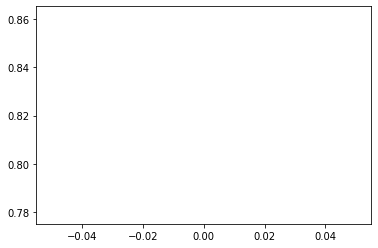

In [35]:
x = np.arange(len(fl))
print(np.argmax(np.array(fl)))
print(fl[np.argmax(np.array(fl))])
plt.plot(x,fl)